# Pitchfork

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [5]:
print(pd.read_sql_query('select * from content',conn).head())

   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


In [6]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [7]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [8]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [10]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [11]:
pd.read_sql_query('select * from years',conn).head()

,reviewid,year
0,22703,1998.0
1,22721,2016.0
2,22659,2016.0
3,22661,2016.0
4,22725,2016.0


In [12]:
df=pd.read_sql_query("select r.reviewid,r.title,r.score,r.best_new_music,a.artist,r.author,r.author_type,r.pub_month,r.pub_year,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid join artists a on r.reviewid=a.reviewid",conn)
df.head()

,reviewid,title,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,22703,mezzanine,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,22721,prelapsarian,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,22661,first songs,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


In [13]:
conn.close()

In [14]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

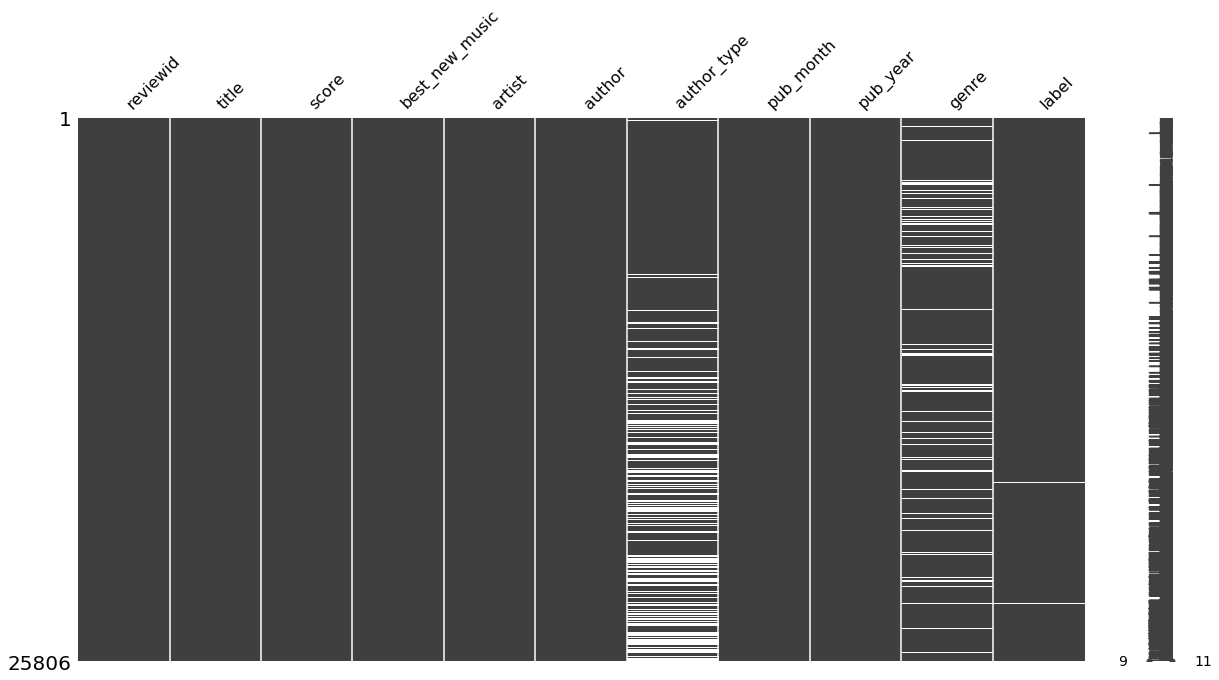

In [15]:
import missingno
missingno.matrix(df,figsize=(20,10))

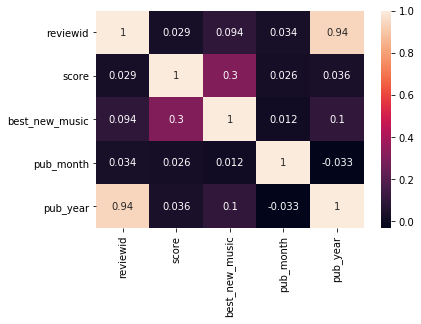

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type       5630
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

In [18]:
df=df.drop(['reviewid','title'],axis=1)

In [19]:
df.head()

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


# Features

## Artists

In [20]:
df['artist'].value_counts()

various artists    785
xiu xiu             42
prince              40
deerhoof            36
xasthur             36
                  ... 
tim presley          1
southerly            1
flying canyon        1
world standard       1
biirdie              1
Name: artist, Length: 8633, dtype: int64

## Score

In [21]:
df['score']

0        9.3
1        7.9
2        7.3
3        7.3
4        9.0
        ... 
25801    6.3
25802    7.2
25803    7.2
25804    7.2
25805    6.5
Name: score, Length: 25806, dtype: float64

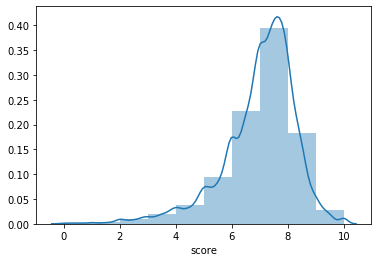

In [22]:
sns.distplot(df['score'],bins=10)

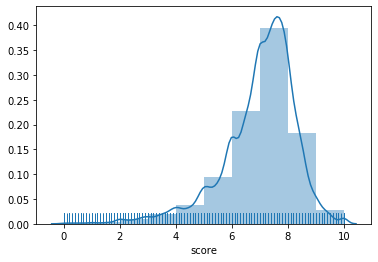

In [23]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);


In [24]:
df['score'].value_counts(bins=10)

(7.0, 8.0]       10104
(6.0, 7.0]        6474
(8.0, 9.0]        3759
(5.0, 6.0]        2818
(4.0, 5.0]        1147
(3.0, 4.0]         568
(9.0, 10.0]        519
(2.0, 3.0]         260
(1.0, 2.0]         105
(-0.011, 1.0]       52
Name: score, dtype: int64

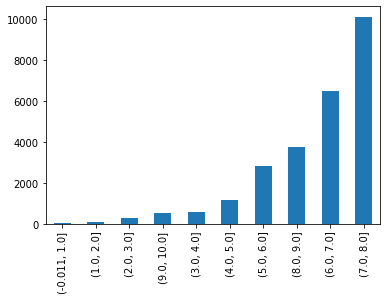

In [25]:
df['score'].value_counts(bins=10,ascending=True).plot(kind='bar',)

## Best New Music

In [26]:
df['best_new_music'].value_counts()

0    24434
1     1372
Name: best_new_music, dtype: int64

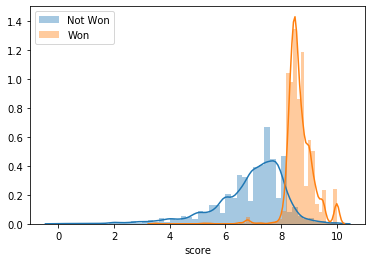

In [27]:
sns.distplot(df[df['best_new_music']==0]['score'])
sns.distplot(df[df['best_new_music']==1]['score'])
plt.legend(labels=['Not Won','Won'])
plt.show()

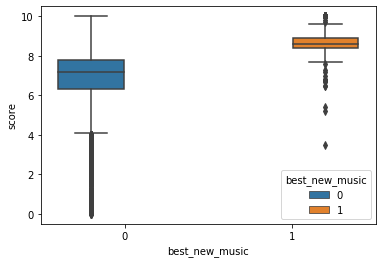

In [28]:
plt.figure()
sns.boxplot(y='score',x='best_new_music',hue='best_new_music',data=df)

In [29]:
df[(df['score']<4)&(df['best_new_music']==1)]

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
9832,3.5,1,weezer,ian cohen,contributor,11,2010,rock,geffen


In [30]:
df.drop([9832],axis=0,inplace=True)

## Author

In [31]:
df['author'].value_counts(dropna=False)

joe tangari                      1118
ian cohen                         964
stephen m. deusner                866
mark richardson                   716
brian howe                        706
                                 ... 
alan smithee                        1
chris dahlen & ryan schreiber       1
alex lindhart                       1
brendan mattox                      1
dan kilian & ryan schreiber         1
Name: author, Length: 432, dtype: int64

In [32]:
df[df['score']>7]['author'].value_counts()

joe tangari           811
mark richardson       501
stephen m. deusner    476
brian howe            413
marc masters          375
                     ... 
john everhart           1
matt stephens           1
max mertens             1
rohan samarth           1
yancey strickler        1
Name: author, Length: 388, dtype: int64

## Author Type

In [33]:
df['author_type'].value_counts(dropna=False)

contributor                  17243
NaN                           5630
senior editor                  734
executive editor               714
senior staff writer            632
contributing editor            242
editor-in-chief                134
deputy news editor             131
associate staff writer         129
tracks coordinator              59
associate reviews editor        59
associate editor                54
assistant editor                19
associate features editor       17
news director                    5
managing editor                  3
Name: author_type, dtype: int64

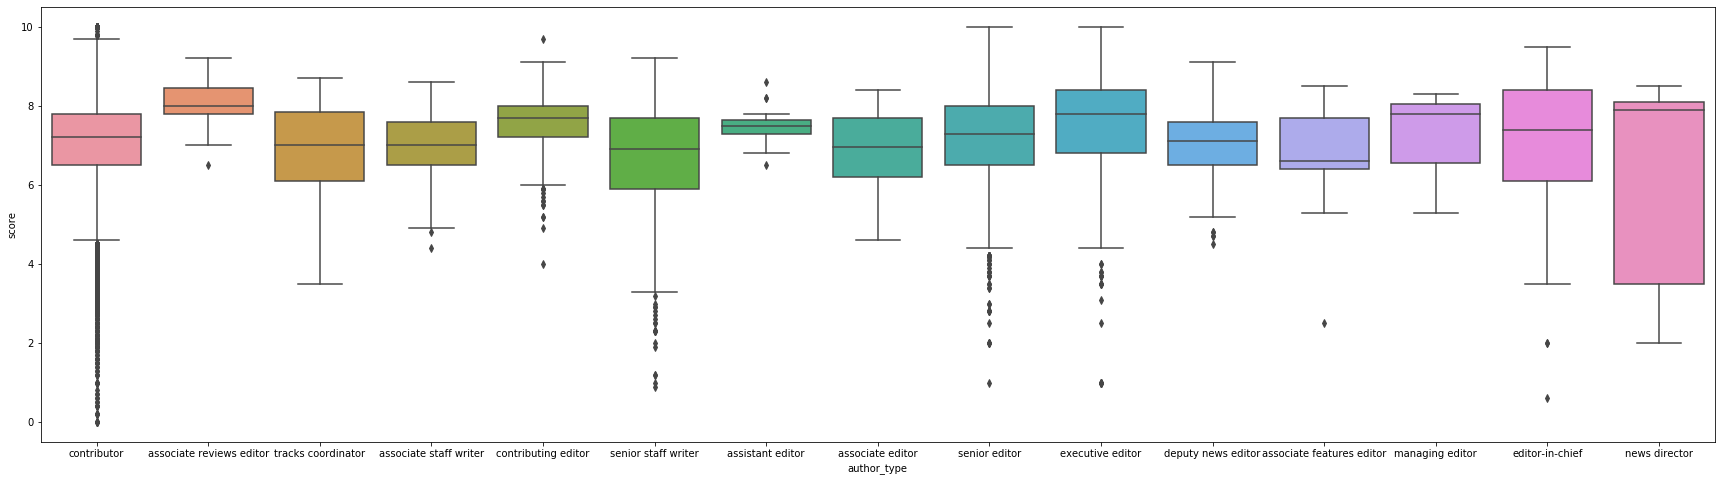

In [34]:
plt.figure(figsize=(30,8))
sns.boxplot(x='author_type',data=df,y='score')

In [35]:
df.isnull().sum()

score                0
best_new_music       0
artist               0
author               0
author_type       5630
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

In [36]:
df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [37]:
df.isnull().sum()

score                0
best_new_music       0
artist               0
author               0
author_type          0
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

## Date
### pub_month,pub_year

In [38]:
df['pub_year'].value_counts()

2011    1794
2006    1782
2010    1748
2007    1733
2008    1691
2016    1674
2005    1644
2012    1631
2009    1623
2004    1612
2013    1599
2014    1558
2003    1528
2015    1358
2002    1295
2001     635
2000     523
1999     354
2017      23
Name: pub_year, dtype: int64

In [39]:
df[df['best_new_music']==1].groupby(by='pub_year').mean()['score']

pub_year
2003    8.680769
2004    8.691803
2005    8.698305
2006    8.668750
2007    8.658571
2008    8.596667
2009    8.698425
2010    8.741860
2011    8.682707
2012    8.724590
2013    8.644444
2014    8.720000
2015    8.666990
2016    8.510000
2017    8.920000
Name: score, dtype: float64

In [40]:
df.groupby(by=['pub_year']).mean().T

pub_year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
score,6.768362,6.870937,7.098740,6.857606,6.945877,7.181390,7.073844,6.989562,6.863935,6.903844,6.770856,6.940904,6.990858,6.969405,7.007004,7.091014,7.108468,7.242593,7.408696
best_new_music,0.000000,0.000000,0.000000,0.000000,0.051047,0.037841,0.035888,0.026936,0.040392,0.035482,0.078250,0.073799,0.074136,0.074801,0.078799,0.077022,0.075847,0.077658,0.217391
pub_month,6.429379,6.426386,8.092913,6.196911,6.225785,6.375310,6.405109,6.366442,6.226774,6.015967,6.155884,6.189931,6.000557,6.005518,6.180738,6.319641,6.329897,6.393070,1.000000


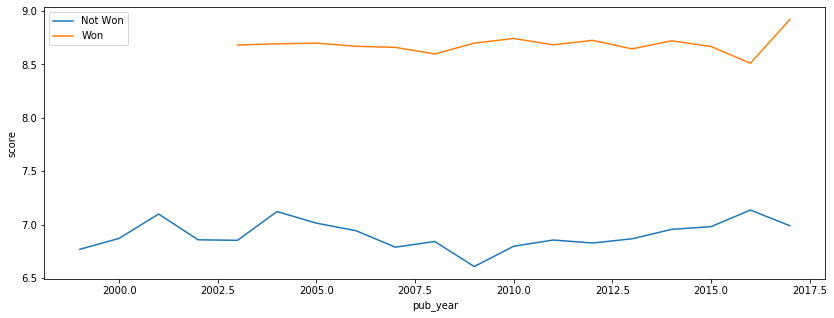

In [41]:
plt.figure(figsize=(14,5))
sns.lineplot(y=df[df['best_new_music']==0].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==0].groupby(by='pub_year').mean().index)
sns.lineplot(y=df[df['best_new_music']==1].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==1].groupby(by='pub_year').mean().index)
plt.legend(labels=['Not Won','Won'])
plt.show()

## Inference
    1.Best New Music awards started from 2003
    2. Removing values from 2017 since it seems that data has been taken from early 2017

In [42]:
df=df[df['pub_year']!=2017]

### pub_month

In [43]:
df['pub_month'].value_counts()

10    2487
4     2405
3     2396
6     2315
5     2267
9     2241
2     2142
11    2130
1     2091
7     2089
8     2075
12    1144
Name: pub_month, dtype: int64

## Genre

In [44]:
df['genre'].value_counts(dropna=False)

rock            10577
electronic       4356
NaN              2589
experimental     2114
rap              1939
pop/r&b          1669
metal             954
folk/country      772
jazz              536
global            276
Name: genre, dtype: int64

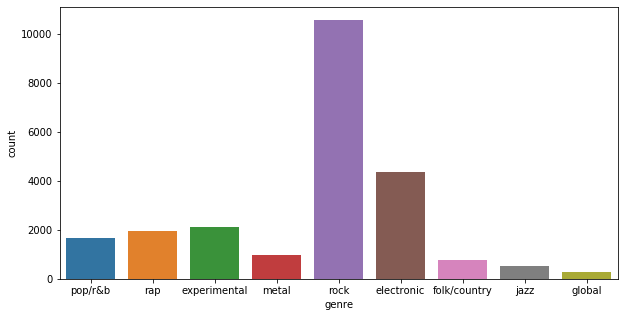

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df['genre'])
plt.show()

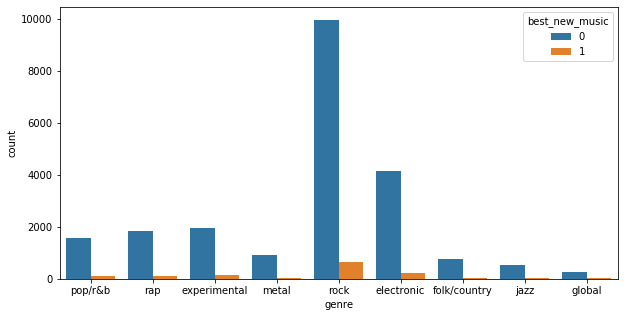

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='genre',hue='best_new_music',data=df)
plt.show()

## Labels

In [47]:
df['label'].isnull().sum()

44

In [48]:
df['label'].fillna('None',inplace=True)

## Base Model

In [49]:
df.head()

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
23,8.1,0,chance the rapper,sheldon pearce,associate staff writer,12,2016,pop/r&b,self-released
24,8.1,0,jeremih,sheldon pearce,associate staff writer,12,2016,pop/r&b,self-released
25,8.1,0,chance the rapper,sheldon pearce,associate staff writer,12,2016,rap,self-released
26,8.1,0,jeremih,sheldon pearce,associate staff writer,12,2016,rap,self-released
27,7.2,0,jamire williams,benjamin scheim,contributor,12,2016,experimental,leaving


In [50]:
## Shape before Dropping
df.shape

(25782, 9)

In [51]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['artist', 'author', 'author_type', 'genre', 'label']

In [52]:
cols=['author_type','genre']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [53]:
df['label'].isnull().sum()

0

In [54]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['artist']=le.fit_transform(df['artist'])
df['author']=le.fit_transform(df['author'])
df['label']=le.fit_transform(df['label'])
#df['pub_year']=le.fit_transform(df['pub_year'])

In [55]:
#df=df.dropna()

### MICE imputer

In [56]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

'from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimp = IterativeImputer(max_iter=10, random_state=0)'

In [57]:
'''df=pd.DataFrame(imp.fit_transform(df))'''

'df=pd.DataFrame(imp.fit_transform(df))'

In [58]:
## Shape after dropping
#df.shape

In [59]:
df.head()

,score,best_new_music,artist,author,pub_month,pub_year,label,author_type_associate editor,author_type_associate features editor,author_type_associate reviews editor,...,author_type_senior staff writer,author_type_tracks coordinator,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock
23,8.1,0,1258,389,12,2016,2828,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,8.1,0,3560,389,12,2016,2828,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,8.1,0,1258,389,12,2016,2828,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26,8.1,0,3560,389,12,2016,2828,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27,7.2,0,3456,44,12,2016,1834,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
df.iloc[:,[1]]

,best_new_music
23,0
24,0
25,0
26,0
27,0
...,...
25801,0
25802,0
25803,0
25804,0


In [61]:
df.isnull().sum()

score                                    0
best_new_music                           0
artist                                   0
author                                   0
pub_month                                0
pub_year                                 0
label                                    0
author_type_associate editor             0
author_type_associate features editor    0
author_type_associate reviews editor     0
author_type_associate staff writer       0
author_type_contributing editor          0
author_type_contributor                  0
author_type_deputy news editor           0
author_type_editor-in-chief              0
author_type_executive editor             0
author_type_managing editor              0
author_type_news director                0
author_type_senior editor                0
author_type_senior staff writer          0
author_type_tracks coordinator           0
genre_experimental                       0
genre_folk/country                       0
genre_globa

## Generating X and Y

In [62]:
y=df['score']
X=df.drop('score',axis=1)

## 1. Base Model

In [63]:
import statsmodels.api as sm
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:47:00   Log-Likelihood:                -42070.
No. Observations:               25782   AIC:                         8.420e+04
Df Residuals:                   25753   BIC:                         8.443e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.4180      3.588      0.674      0.500      -4.615       9.451
best_new_music                            1.7527      0.035     50.099      0.000       1.684       1.821
artist                                 4.967e-06   3.05e-06      1.628      0.103   -1.01e-06    1.09e-05
author                                   -0.0001   6.56e-05     -1.843      0.065      -0.000     7.7e-06
pub_month                                 0.0092      0.002      3.945      0.000       0.005       0.014
pub_year                                  0.0024      0.002      1.367      0.172      -0.001       0.006
label                                  1.786e-05   7.27e-06      2.458      0.014    3.62e-06    3.21e-05
author_type_associate editor             -0.6102      0.331     -1.845      0.065      -1.258       0.038
author_type_associate features editor    -0.9041      0.413     -2.187      0.029      -1.714      -0.094
author_type_associate reviews editor      0.0327      0.330      0.099      0.921      -0.614       0.679
author_type_associate staff writer       -0.4465      0.305     -1.464      0.143      -1.044       0.151
author_type_contributing editor          -0.0049      0.295     -0.016      0.987      -0.584       0.574
author_type_contributor                  -0.5068      0.285     -1.780      0.075      -1.065       0.051
author_type_deputy news editor           -0.4686      0.304     -1.540      0.124      -1.065       0.128
author_type_editor-in-chief              -0.4204      0.305     -1.379      0.168      -1.018       0.177
author_type_executive editor             -0.2699      0.288     -0.936      0.349      -0.835       0.295
author_type_managing editor              -0.8309      0.769     -1.080      0.280      -2.339       0.677
author_type_news director                -1.7570      0.623     -2.821      0.005      -2.978      -0.536
author_type_senior editor                -0.6043      0.288     -2.098      0.036      -1.169      -0.040
author_type_senior staff writer          -0.8943      0.289     -3.097      0.002      -1.460      -0.328
author_type_tracks coordinator           -0.7318      0.328     -2.234      0.026      -1.374      -0.090
genre_experimental                        0.3176      0.031     10.285      0.000       0.257       0.378
genre_folk/country                        0.2801      0.047      5.941      0.000       0.188       0.373
genre_global                              0.4173      0.076      5.488      0.000       0.268       0.566
genre_jazz                                0.3553      0.056      6.388      0.000       0.246       0.464
genre_metal                               0.0281      0.043      0.654      0.513      -0.056       0.112
genre_pop

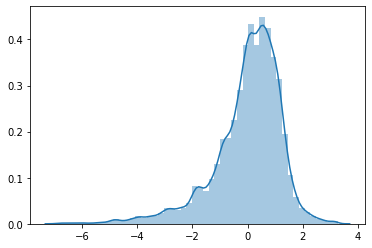

In [64]:
residuals=model.resid
sns.distplot(residuals)

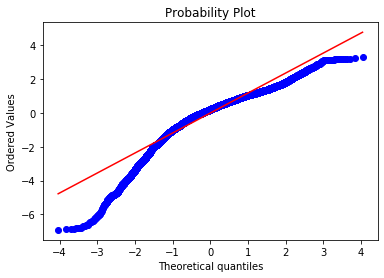

In [65]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

## 2. Model using Backward Elimation method

In [66]:
# Backward Elimination
cols=list(X.columns)
pmax=1
while len(cols)>0:
    p=[]
    C=X[cols]
    xc=sm.add_constant(C)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_cols=cols
print(selected_cols)

['best_new_music', 'pub_month', 'label', 'author_type_associate editor', 'author_type_associate features editor', 'author_type_associate staff writer', 'author_type_contributor', 'author_type_deputy news editor', 'author_type_editor-in-chief', 'author_type_executive editor', 'author_type_news director', 'author_type_senior editor', 'author_type_senior staff writer', 'author_type_tracks coordinator', 'genre_experimental', 'genre_folk/country', 'genre_global', 'genre_jazz', 'genre_pop/r&b', 'genre_rap']


In [67]:
X_final=df[cols]
y=df['score']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [69]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_train=LR.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.11121321308094134
RMSE of Train: 1.238941099438949


In [70]:
y_pred_test=LR.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.09872879663372702
RMSE of Test: 1.2342547919327407


## 3. K-Fold

In [71]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['MVLR']):
    rmse=[]

    for train, test in kf.split(X_final,y):
        X_train,X_test=X_final.iloc[train,:],X_final.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse.append(np.sqrt(mse(y_test,y_pred)))
print(rmse)

[1.2311981706423971, 1.2303901944590845, 1.2220677683268248, 1.2687293144824205, 1.2405704256754846]


In [72]:
np.mean(rmse),np.var(rmse,ddof=1)


(1.2385911747172422, 0.00032679011201234534)

### 4.Lasso/Ridge/ElasticNet

## 4.1 Lasso

In [73]:
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso(alpha=0.04,normalize=True)

In [74]:
X_final=df[cols]
y=df['score']
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [75]:
lasso.fit(X_train,y_train)
y_pred_train=lasso.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.0
RMSE of Train: 1.314170957460442


In [76]:
y_pred_test=lasso.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -3.74911344191986e-08
RMSE of Test: 1.3001009709072389


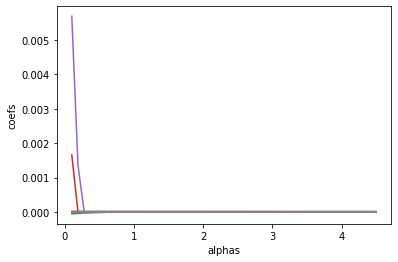

In [77]:
n_alphas = 50
alphas = np.linspace(0.1,4.5, n_alphas)
coefs=[]
lasso = Lasso()
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [78]:
n_alphas=50
alphas=np.linspace(0.1,1, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102...
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [79]:
lasso_cv.alpha_

1.0

In [80]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso.coef_
pd.DataFrame(lasso.coef_, X_final.columns, columns=['coefs'])

,coefs
best_new_music,0.000000
pub_month,0.000000
label,0.000019
author_type_associate editor,-0.000000
author_type_associate features editor,-0.000000
author_type_associate staff writer,-0.000000
author_type_contributor,-0.000000
author_type_deputy news editor,-0.000000
author_type_editor-in-chief,0.000000
author_type_executive editor,0.000000


In [81]:
y_pred_train=lasso.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.00025419972885443176
RMSE of Train: 1.3140039158937598


In [82]:
y_pred_test=lasso.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.00022090515050099402
RMSE of Test: 1.2999573391071357


### 4.2 Ridge

In [83]:
from sklearn.linear_model import Ridge,RidgeCV
ridge=Ridge(alpha=0.05)

In [84]:
ridge.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.11082449468964406
RMSE of Train: 1.2392120004873326


In [85]:
y_pred_test=ridge.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.09872774902156145
RMSE of Test: 1.2342555092639698


In [86]:
ridge.fit(X, y)
ridge.coef_
pd.DataFrame(ridge.coef_, X.columns, columns=['coefs'])

,coefs
best_new_music,1.752602
artist,0.000005
author,-0.000121
pub_month,0.009208
pub_year,0.002431
label,0.000018
author_type_associate editor,-0.588289
author_type_associate features editor,-0.880271
author_type_associate reviews editor,0.054044
author_type_associate staff writer,-0.425032


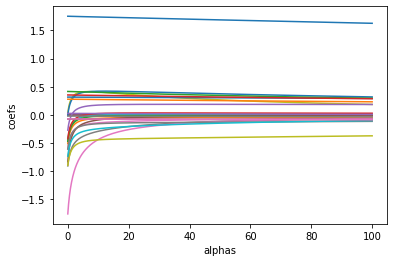

In [87]:
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)
coefs=[]
model = Ridge()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [88]:
n_alphas = 1000
alphas = np.logspace(-2, 0)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

ridge_cv.alpha_

1.0

In [89]:
ridge=Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
y_pred_train=ridge.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.11119127104956716
RMSE of Train: 1.238956392598734


In [91]:
y_pred_test=ridge.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.09870419029702893
RMSE of Test: 1.2342716405137109


### 4.3 Elastic Net/Elastic Net CV

In [92]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
enet = ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.04041136730386896
RMSE of Train: 1.2873434053290678


In [94]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.03570158384272826
RMSE of Test: 1.27668219375571


In [95]:
pd.DataFrame(enet.coef_, X_final.columns, columns=['coefs'])

,coefs
best_new_music,0.418304
pub_month,0.005392
label,0.000021
author_type_associate editor,-0.000000
author_type_associate features editor,-0.000000
author_type_associate staff writer,-0.000000
author_type_contributor,-0.000000
author_type_deputy news editor,-0.000000
author_type_editor-in-chief,0.000000
author_type_executive editor,0.000000


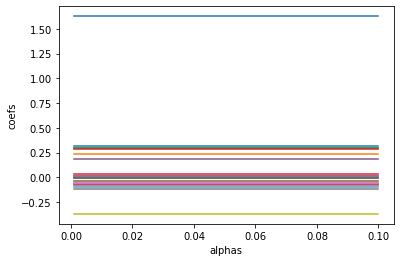

In [96]:
n_alphas = 200
alphas = np.logspace(-3, -1, n_alphas)
coefs=[]
enet = ElasticNet()
for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(X_final, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [97]:
n_alphas = 2000
alphas = np.logspace(-3, 1, n_alphas)

en_cv = ElasticNetCV(alphas=alphas, cv=3)
en_cv.fit(X_final, y)
en_cv.alpha_

0.001

In [98]:
enet = ElasticNet(alpha=en_cv.alpha_)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.10961329308653966
RMSE of Train: 1.2400557173749858


In [100]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.09785219208012585
RMSE of Test: 1.234854883453094


### 5 Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [102]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [103]:
y_pred_train=dtr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.719688882693008
RMSE of Train: 0.6957801371163005


In [104]:
y_pred_test=dtr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.19921216277481424
RMSE of Test: 1.423721641939102


### 6. Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [106]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [107]:
y_pred_train=rfr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.6539483813560703
RMSE of Train: 0.7730762080262948


In [108]:
y_pred_test=rfr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.07232449491569337
RMSE of Test: 1.2522040934611047


### 7. KNN

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=5)

In [110]:
knnr.fit(X_train,y_train)
y_pred_train=knnr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.3009278828095039
RMSE of Train: 1.0987853376126755


In [111]:
y_pred_test=knnr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.03599655027434978
RMSE of Test: 1.323293651917409


### 8. Bayesian Ridge

In [112]:
from sklearn.linear_model import BayesianRidge
bay=BayesianRidge()

In [113]:
bay.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [114]:
y_pred_train=bay.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.11103469020093215
RMSE of Train: 1.239065520858693


In [115]:
y_pred_test=bay.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.0986365523824454
RMSE of Test: 1.2343179527192567


### 9. Bagging

In [116]:
from sklearn.ensemble import BaggingRegressor
baggr_lr=BaggingRegressor(base_estimator=LinearRegression())

In [117]:
baggr_lr.fit(X_train,y_train)
y_pred_train=baggr_lr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.11108915903134231
RMSE of Train: 1.2390275601627962


In [118]:
y_pred_test=baggr_lr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.09854210852728973
RMSE of Test: 1.2343826162535911


In [119]:
baggr_dt=BaggingRegressor(base_estimator=DecisionTreeRegressor())
baggr_dt.fit(X_train,y_train)
y_pred_train=baggr_dt.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.6254680213165108
RMSE of Train: 0.804259718946351


In [120]:
y_pred_test=baggr_dt.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.04554215572102194
RMSE of Test: 1.2701512801678478


In [121]:
baggr_knn=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=5))
baggr_knn.fit(X_train,y_train)
y_pred_train=baggr_knn.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.33809411346334084
RMSE of Train: 1.0691779337328615


In [122]:
y_pred_test=baggr_knn.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.009364223882436518
RMSE of Test: 1.293999410735507


### 10. Boosting

In [123]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=LinearRegression())
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.07272859077511995
RMSE of Train: 1.265480040997725


In [124]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.05463945070277776
RMSE of Test: 1.2640836436783247


In [125]:
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.05921745133449685
RMSE of Train: 1.2746662638140132


In [126]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.04117919801061132
RMSE of Test: 1.2730509880571528
